array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='AnnualSalary', ylabel='Age'>,
        <Axes: xlabel='Purchased', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='AnnualSalary'>,
        <Axes: xlabel='AnnualSalary', ylabel='AnnualSalary'>,
        <Axes: xlabel='Purchased', ylabel='AnnualSalary'>],
       [<Axes: xlabel='Age', ylabel='Purchased'>,
        <Axes: xlabel='AnnualSalary', ylabel='Purchased'>,
        <Axes: xlabel='Purchased', ylabel='Purchased'>]], dtype=object)

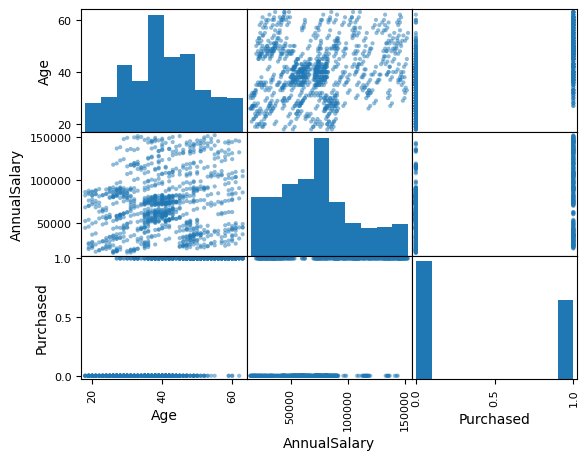

In [2]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
import seaborn

url = "https://raw.githubusercontent.com/dowd7/Capstone/main/car_data.csv"

df = pd.read_csv(url)

scatter_matrix(df)

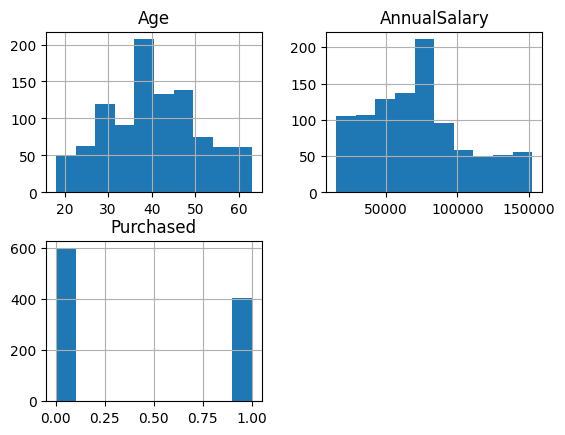

In [3]:
df.hist()
pyplot.show()

In [38]:
log_model = linear_model.LogisticRegression()
svm_model = svm.SVC(probability=True)

y = df.values[:,2]
X = df.values[:,0:2]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
print("Precision: " + str(metrics.precision_score(y_test, y_pred)))
print(svm_model.predict(X_test))

Accuracy: 0.7466666666666667
Precision: 0.8870967741935484
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0]


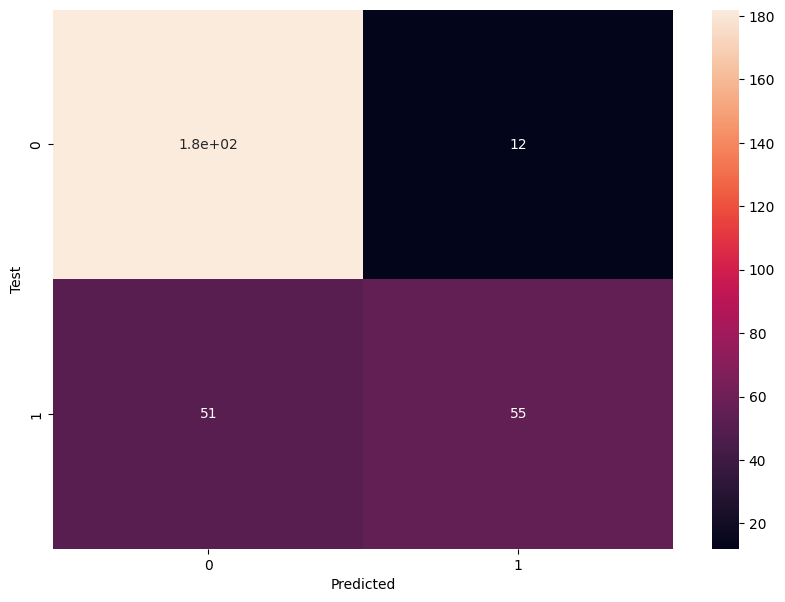

In [5]:
cm = metrics.confusion_matrix(y_test, y_pred)

pyplot.figure(figsize=(10,7))
seaborn.heatmap(cm, annot=True)
pyplot.xlabel('Predicted')
pyplot.ylabel('Test')
pyplot.show()

In [40]:
value = input("Enter age and income, e.g., 41 10000:\n")
valueList = list(value.split(" "))
result = svm_model.predict_proba([valueList])
print(round(result[0][1],4))

Enter age and income, e.g., 41 10000:
45 100000
0.6813
